## Analyze tree coverage from satellite images

- [original article from 4quant](http://4quant.com/geospatialdemo/)
- Method:
    - detect "dark green" areas in the image by $green > (red + blue) / 2$ and $green < 50$ 
    - make the detected regions as joined as possible - since we are not aiming at separating them, but estimating their coverages
    - do morphology analysis
- image snapshot is from arcgisonline

In [1]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
from skimage import io, morphology, measure, color
import numpy as np

(256, 256, 3) 13 208


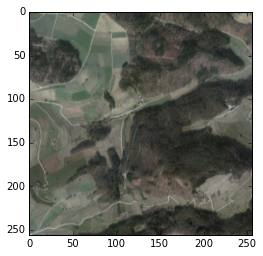

In [5]:
## take a snapshot of satellite image
img_url = "http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/14/5725/8565"
img = io.imread(img_url)
plt.imshow(img)
print img.shape, img.min(), img.max()

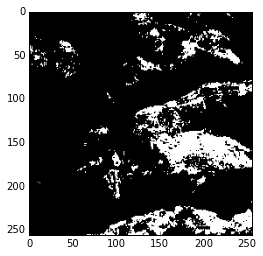

In [6]:
## binarize the image by finding the dark green area
is_more_green = img[:, :, 1] > (img[:, :, 0] + img[:, :, 2]) / 2.
is_dark_green = img[:,:,1] < 50
green_map = is_more_green & is_dark_green
plt.imshow(green_map, cmap = plt.cm.gray)

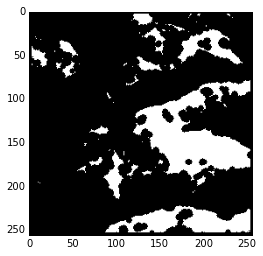

In [7]:
## make the regions smooth so that the convex hull can be conducted
## don't use the scipy.ndimage.binary_fille_holes because the holes can actually
## measure the deforestation
tree_map = morphology.binary_closing(green_map, selem = morphology.disk(3))
plt.imshow(tree_map, cmap = plt.cm.gray)

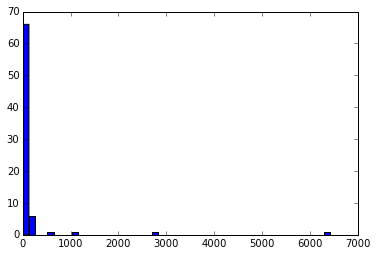

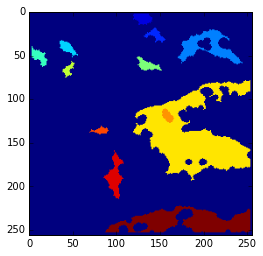

In [21]:
## label the tree area and filter out parts that are too small
labels = measure.label(tree_map)

## filter out regions
regions = measure.regionprops(labels)
areas = [r.area for r in regions]
_ = plt.hist(areas, bins = 50)
selected_labels = [r.label for r in regions if r.area > 100]
newlabels = np.zeros_like(labels)
for i, label in enumerate(selected_labels, 1):
    newlabels[labels == label] = i

plt.figure()
plt.imshow(newlabels)

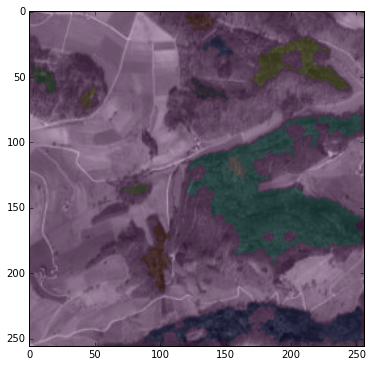

In [35]:
plt.figure(figsize = (6, 6))
plt.imshow(color.label2rgb(newlabels, image = img, bg_label=0, alpha = 0.1, bg_color=(1, 0, 1)))